In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
import statannot

# Compare DeepCellState variations

In [2]:
import seaborn as sns
sns.set()

In [5]:
res_dcs_noise = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_with_noise_10k.csv',index_col=0)
res_dcs_noise['model'] = 'DCS'
res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_no_noise_10k.csv',index_col=0)
res_dcs_nonoise['model'] = 'DCS modified v1'
res_notvae_2encs = pd.read_csv('../results/my_results_10kgenes/allgenes_10foldvalidation_notvae_results1000ep512bs.csv',index_col=0)
res_notvae_2encs['model'] = 'model variation 1'
res_dcs_direct = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_direct_andl2similarity_10k.csv',index_col=0)
res_dcs_direct['model'] = 'DCS modified v2'
baseline = pd.read_csv('../results/baseline_evaluation_allgenes.csv',index_col=0)
baseline = baseline.drop_duplicates()

# add mi
res_mi = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
res_mi['model'] = 'model variation 3'

In [6]:
# # add TransCompRmixedANNS
# res_annTransCompR = pd.read_csv('../results/ANNmixedTransCompR_results_10k/allgenes_10foldvalidation_ANNmixedTransCompR_500ep512bs_a375_ht29.csv',index_col=0)
# res_annTransCompR['model'] = 'TransCompR-combined and Autoencoders with classifier'

In [7]:
res_cpa = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_withCPA_1000ep512bs_a375_ht29.csv',index_col=0)
res_cpa['model'] = 'model variation 2'

In [8]:
res_mi_class = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs_ht29_a375_withclass.csv',index_col=0)
res_mi_class['model'] = 'model variation 3'
res_transCompR = pd.read_csv('../results/TransCompR_results/allgenes_10foldvalidation_transcompr_decoders_1000ep512bs_a375_ht29.csv',index_col=0)
res_transCompR['model'] = 'TransCompR'
res_fit = pd.read_csv('../results/FITmodel_results/allgenes_10foldvalidation_FIT_a375_ht29.csv',index_col=0)
res_fit['model'] = 'FIT'

In [9]:
# # add mi
# res_mi = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs_pc3_ha1e.csv',index_col=0)
# res_mi['model'] = 'Translation Model'

# res_mi_class = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_2000ep512bs_pc3_ha1e_withclass.csv',index_col=0)
# res_mi_class['model'] = 'Translation Model with classifier'

In [10]:
# res_dcs_noise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_withnoise.csv',index_col=0)
# res_dcs_noise['model'] = 'DCS'
# res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_no_noise.csv',index_col=0)
# res_dcs_nonoise['model'] = 'DCS modified v1'
# res_notvae_2encs = pd.read_csv('../results/my_results/landmarks_10foldvalidation_vae_results1000ep512bs.csv',index_col=0)
# res_notvae_2encs['model'] = 'Two Autoencoders'
# res_dcs_direct = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_direct_and_l2similarity.csv',index_col=0)
# res_dcs_direct['model'] = 'DCS modified v2'
# baseline = pd.read_csv('../results/baseline_evaluation_landmarks.csv',index_col=0)
# baseline = baseline.drop_duplicates()

# # # add mi
# # res_mi = pd.read_csv('../results/MI_results/landmarks_10foldvalidation_pretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
# # res_mi['model'] = 'MI Autoencoders'

In [11]:
results = pd.concat([res_dcs_noise,res_dcs_nonoise,res_notvae_2encs,
                     res_dcs_direct,res_cpa,res_mi_class,
                     res_transCompR],axis=0)
#res_annTransCompR
results

,model_pearsonHT29,model_pearsonA375,model_spearHT29,model_spearA375,model_accHT29,model_accA375,recon_pear_ht29,recon_pear_a375,recon_spear_ht29,recon_spear_a375,...,recon_acc_a375,cross_corr_ht29,cross_corr_a375,Direct_pearson,Direct_spearman,DirectAcc_ht29,DirectAcc_a375,model,F1_score,ClassAccuracy
0,0.613718,0.599170,0.526330,0.512294,0.685056,0.680166,0.947445,0.944607,0.937704,0.931870,...,0.891681,0.920867,0.920973,0.491287,0.213417,0.642906,0.642906,DCS,NaN,NaN
1,0.566115,0.558736,0.464582,0.463245,0.663853,0.665333,0.945406,0.942046,0.934308,0.929751,...,0.889458,0.915497,0.915471,0.449773,0.484918,0.631011,0.631011,DCS,NaN,NaN
2,0.609149,0.582151,0.492402,0.473071,0.667321,0.661947,0.942116,0.947642,0.933452,0.935973,...,0.894833,0.911275,0.915116,0.467521,0.225109,0.626187,0.626187,DCS,NaN,NaN
3,0.530387,0.514541,0.418556,0.411831,0.646344,0.644403,0.944477,0.941711,0.933683,0.929063,...,0.889775,0.913457,0.919640,0.420189,0.132573,0.617286,0.617286,DCS,NaN,NaN
4,0.649465,0.635018,0.522971,0.505391,0.686253,0.680406,0.950940,0.945411,0.942423,0.933031,...,0.894141,0.923569,0.925903,0.534992,0.588160,0.646800,0.646800,DCS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.572714,0.552361,0.482618,0.459567,0.669031,0.662602,0.869644,0.870845,0.841884,0.833748,...,0.830252,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN
6,0.517275,0.448766,0.429654,0.385287,0.647088,0.630542,0.861795,0.854774,0.833605,0.820409,...,0.821250,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN
7,0.613800,0.578690,0.528382,0.453449,0.688293,0.660842,0.877211,0.846940,0.854646,0.813830,...,0.817877,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN
8,0.504796,0.400220,0.399192,0.322164,0.634823,0.604707,0.853622,0.851408,0.827085,0.814839,...,0.818141,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN


## A375 trasnlation

In [12]:
res_to_a375 = results.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_to_a375.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_a375']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_fit_a375 = res_fit.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_fit_a375.columns = ['pearson','spearman','sign accuracy','model']
res_to_a375 = pd.concat([res_to_a375,res_baseline,res_fit_a375],axis=0)
res_to_a375

,pearson,spearman,sign accuracy,model
0,0.599170,0.512294,0.680166,DCS
1,0.558736,0.463245,0.665333,DCS
2,0.582151,0.473071,0.661947,DCS
3,0.514541,0.411831,0.644403,DCS
4,0.635018,0.505391,0.680406,DCS
...,...,...,...,...
5,0.484918,0.640643,0.406802,FIT
6,0.397843,0.612002,0.333542,FIT
7,0.499022,0.631420,0.387057,FIT
8,0.383503,0.603520,0.312379,FIT


In [13]:
res_to_a375 = pd.melt(res_to_a375,id_vars=['model'])
res_to_a375.columns = ['model','metric','value']
res_to_a375

,model,metric,value
0,DCS,pearson,0.599170
1,DCS,pearson,0.558736
2,DCS,pearson,0.582151
3,DCS,pearson,0.514541
4,DCS,pearson,0.635018
...,...,...,...
265,FIT,sign accuracy,0.406802
266,FIT,sign accuracy,0.333542
267,FIT,sign accuracy,0.387057
268,FIT,sign accuracy,0.312379


In [14]:
plt.rcParams["figure.figsize"] = (8, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


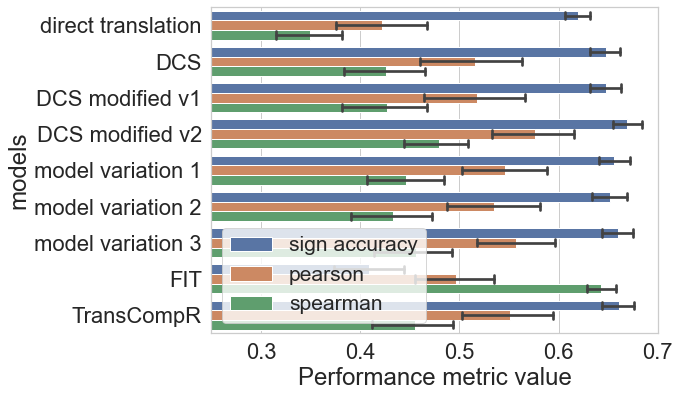

In [15]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(8,7), dpi= 300)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_a375,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','FIT','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.xlim(0.25,0.7)
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')
# statannot.add_stat_annotation(ax=ax, 
#                               data=res_to_a375,
#                               y="value",
#                               x="model",
#                               order=['direct translation','DCS',
#                                      'DCS modified v1','DCS modified v2',
#                                      'similarity-trained Autoencoders','GAN-based Autoencoders',
#                                      'TransCompR-combined and GAN-based Autoencoders'],
#                               hue_order = ['accuracy','pearson','spearman'],
#                               hue="metric",
#                               box_pairs=[
#                                   (("DCS", "pearson"), ("similarity-trained Autoencoders","pearson"))],
#                               test="Mann-Whitney",
#                               loc = 'inside',
#                               verbose=0
#                              )
plt.savefig('../figures/MI_results/allgenes_autoencoders_compare_allgenes_a375.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [16]:
from scipy import stats

In [17]:
models = ['DCS','DCS modified v1','DCS modified v2','model variation 1',
          'direct translation','model variation 3',
          'model variation 2','FIT','TransCompR']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-17-37421d21c162>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-17-37421d21c162>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [18]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-18-2bb75a293747>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
<ipython-input-18-2bb75a293747>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values


In [19]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-19-a9ff6e3ced82>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
<ipython-input-19-a9ff6e3ced82>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values


In [20]:
a375_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_translate = a375_translate[['metric','DCS','DCS modified v1','DCS modified v2','model variation 1','direct translation',
                                 'model variation 3','model variation 2','FIT','TransCompR']]
# a375_translate.to_csv('../results/MI_results/allgenes_a375_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
a375_translate

,metric,DCS,DCS modified v1,DCS modified v2,model variation 1,direct translation,model variation 3,model variation 2,FIT,TransCompR
DCS,pearson,1.0,0.850107,0.075662,0.384673,0.031209,0.273036,0.677585,0.520523,0.384673
DCS modified v1,pearson,0.0,1.000000,0.104110,0.520523,0.031209,0.344704,0.850107,0.520523,0.384673
DCS modified v2,pearson,0.0,0.000000,1.000000,0.241322,0.001315,0.472676,0.104110,0.031209,0.307489
model variation 1,pearson,0.0,0.000000,0.000000,1.000000,0.003611,0.520523,0.623176,0.104110,0.733730
direct translation,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.002202,0.007285,0.031209,0.005795
model variation 3,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.344704,0.053903,0.969850
model variation 2,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140465,0.384673
FIT,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.075662
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,1.000000,0.088973,0.623176,0.025748,0.472676,0.969850,0.000183,0.344704


### Same but for reconstruction

In [21]:
res_recon_a375 = results.loc[:,['recon_pear_a375','recon_spear_a375','recon_acc_a375','model']]
res_recon_a375.columns = ['pearson','spearman','sign accuracy','model']
res_recon_a375

,pearson,spearman,sign accuracy,model
0,0.944607,0.931870,0.891681,DCS
1,0.942046,0.929751,0.889458,DCS
2,0.947642,0.935973,0.894833,DCS
3,0.941711,0.929063,0.889775,DCS
4,0.945411,0.933031,0.894141,DCS
...,...,...,...,...
5,0.870845,0.833748,0.830252,TransCompR
6,0.854774,0.820409,0.821250,TransCompR
7,0.846940,0.813830,0.817877,TransCompR
8,0.851408,0.814839,0.818141,TransCompR


In [22]:
res_recon_a375 = pd.melt(res_recon_a375,id_vars=['model'])
res_recon_a375.columns = ['model','metric','value']
res_recon_a375

,model,metric,value
0,DCS,pearson,0.944607
1,DCS,pearson,0.942046
2,DCS,pearson,0.947642
3,DCS,pearson,0.941711
4,DCS,pearson,0.945411
...,...,...,...
205,TransCompR,sign accuracy,0.830252
206,TransCompR,sign accuracy,0.821250
207,TransCompR,sign accuracy,0.817877
208,TransCompR,sign accuracy,0.818141


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


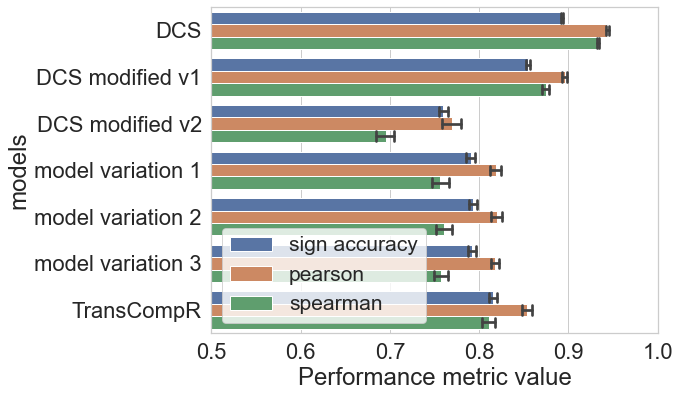

In [23]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_a375,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
plt.xlim(0.5,1.0)
plt.savefig('../figures/MI_results/allgenes_10fold_validation_reconstruction_autoencoders_comparison_allgenes_a375.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [24]:
models = ['DCS','DCS modified v1','DCS modified v2','model variation 1','model variation 3',
          'TransCompR','model variation 2']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='pearson'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-24-f19e3e371941>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='pearson'].value.values
<ipython-input-24-f19e3e371941>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='pearson'].value.values


In [25]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-25-db2d8645d6f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
<ipython-input-25-db2d8645d6f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values


In [26]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-26-26171e6f1a72>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
<ipython-input-26-26171e6f1a72>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values


In [27]:
a375_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_reconstruction = a375_reconstruction[['metric','DCS','DCS modified v1','DCS modified v2','model variation 1','model variation 3','TransCompR','model variation 2']]
# a375_reconstruction.to_csv('../results/MI_results/allgenes_a375_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
a375_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,model variation 1,model variation 3,TransCompR,model variation 2
DCS,pearson,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v2,pearson,0.0,0.000000,1.000000,0.000183,0.000183,0.000183,0.000183
model variation 1,pearson,0.0,0.000000,0.000000,1.000000,0.733730,0.000183,0.909722
model variation 3,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.000183,0.677585
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000183
model variation 2,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v2,spearman,0.0,0.000000,1.000000,0.000183,0.000183,0.000183,0.000183


## HT29 trasnlation

In [28]:
res_to_ht29 = results.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_to_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_ht29']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_fit_ht29 = res_fit.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_fit_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_to_ht29 = pd.concat([res_to_ht29,res_baseline,res_fit_ht29],axis=0)
res_to_ht29

,pearson,spearman,sign accuracy,model
0,0.613718,0.526330,0.685056,DCS
1,0.566115,0.464582,0.663853,DCS
2,0.609149,0.492402,0.667321,DCS
3,0.530387,0.418556,0.646344,DCS
4,0.649465,0.522971,0.686253,DCS
...,...,...,...,...
5,0.507485,0.652826,0.439214,FIT
6,0.426178,0.620179,0.355160,FIT
7,0.541904,0.655602,0.446650,FIT
8,0.395360,0.600902,0.310104,FIT


In [29]:
res_to_ht29 = pd.melt(res_to_ht29,id_vars=['model'])
res_to_ht29.columns = ['model','metric','value']
res_to_ht29

,model,metric,value
0,DCS,pearson,0.613718
1,DCS,pearson,0.566115
2,DCS,pearson,0.609149
3,DCS,pearson,0.530387
4,DCS,pearson,0.649465
...,...,...,...
265,FIT,sign accuracy,0.439214
266,FIT,sign accuracy,0.355160
267,FIT,sign accuracy,0.446650
268,FIT,sign accuracy,0.310104


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


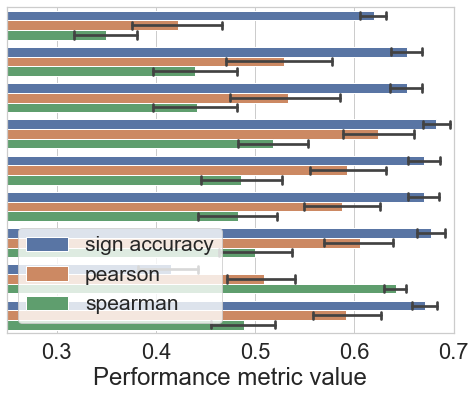

In [30]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_ht29,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','FIT','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='')
plt.yticks([])
plt.xlim(0.25,0.7)
plt.savefig('../figures/MI_results/allgenes_10fold_validation_autoencoders_comparison_allgenes_ht29.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [31]:
models = ['DCS','DCS modified v1','DCS modified v2','model variation 1','direct translation','model variation 3',
          'FIT','TransCompR','model variation 2']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-31-ac94dbb7066c>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
<ipython-input-31-ac94dbb7066c>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values


In [32]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-32-2b2bd44095e3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
<ipython-input-32-2b2bd44095e3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values


In [33]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-33-cfb7e48ca1ad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
<ipython-input-33-cfb7e48ca1ad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values


In [34]:
ht29_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_translate = ht29_translate[['metric','DCS','DCS modified v1','DCS modified v2','model variation 1','direct translation','FIT','TransCompR','model variation 3','model variation 2']]
# ht29_translate.to_csv('../results/MI_results/allgenes_ht29_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
ht29_translate

,metric,DCS,DCS modified v1,DCS modified v2,model variation 1,direct translation,FIT,TransCompR,model variation 3,model variation 2
DCS,pearson,1.0,0.909722,0.021134,0.185877,0.021134,0.520523,0.140465,0.088973,0.185877
DCS modified v1,pearson,0.0,1.000000,0.037635,0.185877,0.021134,0.427355,0.185877,0.088973,0.185877
DCS modified v2,pearson,0.0,0.000000,1.000000,0.427355,0.000183,0.001706,0.307489,0.472676,0.307489
model variation 1,pearson,0.0,0.000000,0.000000,1.000000,0.000330,0.017257,0.909722,0.520523,0.791337
direct translation,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.014019,0.000330,0.000330,0.000440
model variation 3,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.002827,0.623176,1.000000,0.520523
FIT,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.009108,0.000000,0.025748
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.969850
model variation 2,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.969850,0.053903,0.212294,0.011330,0.000183,0.104110,0.075662,0.273036


### Same but for reconstruction

In [36]:
res_recon_ht29 = results.loc[:,['recon_pear_ht29','recon_spear_ht29','recon_acc_ht29','model']]
res_recon_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_recon_ht29

,pearson,spearman,sign accuracy,model
0,0.947445,0.937704,0.896936,DCS
1,0.945406,0.934308,0.894100,DCS
2,0.942116,0.933452,0.893411,DCS
3,0.944477,0.933683,0.894614,DCS
4,0.950940,0.942423,0.903572,DCS
...,...,...,...,...
5,0.869644,0.841884,0.835783,TransCompR
6,0.861795,0.833605,0.830092,TransCompR
7,0.877211,0.854646,0.843838,TransCompR
8,0.853622,0.827085,0.826753,TransCompR


In [37]:
res_recon_ht29 = pd.melt(res_recon_ht29,id_vars=['model'])
res_recon_ht29.columns = ['model','metric','value']
res_recon_ht29

,model,metric,value
0,DCS,pearson,0.947445
1,DCS,pearson,0.945406
2,DCS,pearson,0.942116
3,DCS,pearson,0.944477
4,DCS,pearson,0.950940
...,...,...,...
205,TransCompR,sign accuracy,0.835783
206,TransCompR,sign accuracy,0.830092
207,TransCompR,sign accuracy,0.843838
208,TransCompR,sign accuracy,0.826753


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


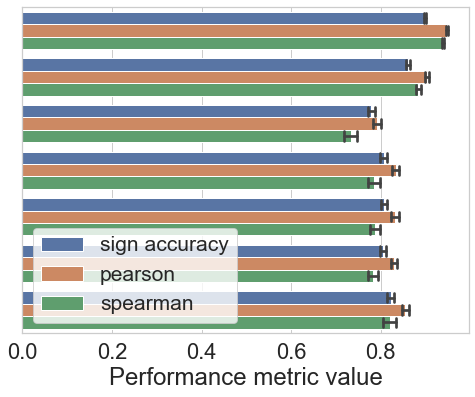

In [38]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_ht29,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='')
plt.yticks([])
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_10fold_validation_reconstruction_autoencoders_comparison_allgenes_ht29.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [39]:
models = ['DCS','DCS modified v1','DCS modified v2','model variation 1','model variation 3',
          'TransCompR','model variation 2']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-39-b9d1d43c52e1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
<ipython-input-39-b9d1d43c52e1>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values


In [40]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-40-d8298965d0b4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
<ipython-input-40-d8298965d0b4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values


In [41]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-41-9d6d1f9e8d53>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
<ipython-input-41-9d6d1f9e8d53>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values


In [42]:
ht29_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_reconstruction = ht29_reconstruction[['metric','DCS','DCS modified v1','DCS modified v2','model variation 1','model variation 3','TransCompR','model variation 2']]
# ht29_reconstruction.to_csv('../results/MI_results/allgenes_ht29_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
ht29_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,model variation 1,model variation 3,TransCompR,model variation 2
DCS,pearson,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v2,pearson,0.0,0.000000,1.000000,0.000330,0.000440,0.000183,0.000583
model variation 1,pearson,0.0,0.000000,0.000000,1.000000,0.677585,0.007285,0.909722
model variation 3,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.001315,0.850107
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.005795
model variation 2,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v2,spearman,0.0,0.000000,1.000000,0.000583,0.000583,0.000183,0.000769


# Combine the barplots from the two cell-lines into one figure with 2 panels

<ipython-input-44-3fc942057759>:60: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


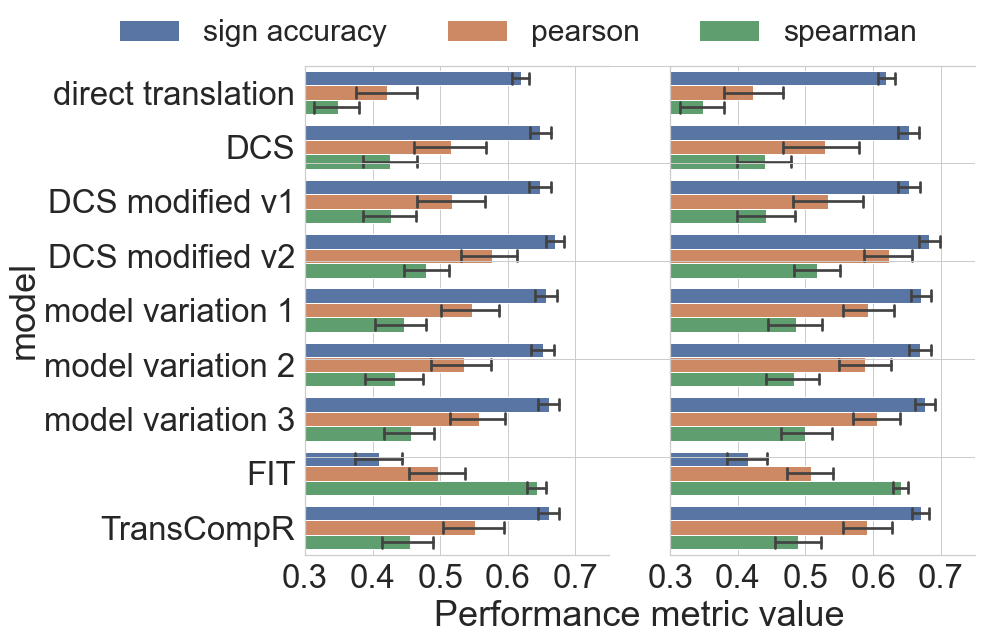

In [44]:
plt.rcParams["figure.figsize"] = (12, 9)

sns.set_theme(style="whitegrid",font_scale=3)
# plt.figure(figsize=(9,12), dpi= 80)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

ax = sns.barplot(ax=axes[0],x="value", y="model", data=res_to_a375,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','FIT','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[0].legend_.remove()

ax = sns.barplot(ax=axes[1],x="value", y="model", data=res_to_ht29,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','FIT','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[1].legend_.remove()

# Fix axes titles and ticks
axes[0].set_xlim([0.3, 0.75])  # Set x-limit for the first subplot
axes[0].set_xticks([0.3,0.4,0.5,0.6,0.7])  # Set x-ticks for the first subplot
axes[1].set_xlim([0.3, 0.75])  # Set x-limit for the second subplot
axes[1].set_xticks([0.3,0.4,0.5,0.6,0.7])  # Set x-ticks for the second subplot
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([])

legend_labels = ['sign accuracy','pearson','spearman']
# Get the handles and labels from any of the subplots
handles, labels = axes[0].get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=legend_labels, 
          title='', 
          loc='upper center', 
          bbox_to_anchor=(-0.5, 1.15), 
          ncol=len(legend_labels), 
          frameon=False,
          fontsize='small')

# # Add a common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xticks([])
plt.xlabel("Performance metric value", labelpad=45)

# Remove borders of subplots
for ax in axes:
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

plt.tight_layout()
# Adjust subplot spacing
# plt.subplots_adjust(wspace=1)

plt.savefig('../figures/MI_results/allgenes_figure1c_translation.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

<ipython-input-45-81a5d8cd1241>:66: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


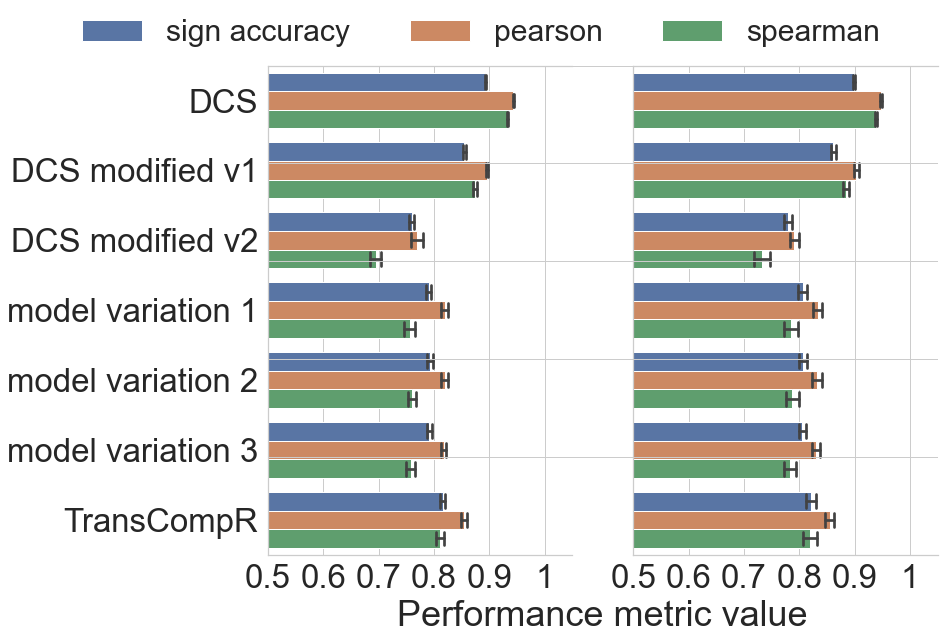

In [45]:
sns.set_theme(style="whitegrid",font_scale=3)
# plt.figure(figsize=(9,12), dpi= 80)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2,sharex=False)

ax = sns.barplot(ax=axes[0],x="value", y="model", data=res_recon_a375,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[0].legend_.remove()

ax = sns.barplot(ax=axes[1],x="value", y="model", data=res_recon_ht29,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'model variation 1','model variation 2',
                   'model variation 3','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[1].legend_.remove()

# Fix axes titles and ticks
# For subplot 1
axes[0].set_xlim([0.5, 1.05])  # Set x-limit for the first subplot
axes[0].set_xticks([0.5,0.6,0.7,0.8,0.9,1])  # Set x-ticks for the first subplot
axes[0].set_xticklabels([0.5,0.6,0.7,0.8,0.9,1])
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# For the second subplot
axes[1].set_xlim([0.5, 1.05])  # Set x-limit for the second subplot
axes[1].set_xticks([0.5,0.6,0.7,0.8,0.9,1])  # Set x-ticks for the second subplot
axes[1].set_xticklabels([0.5,0.6,0.7,0.8,0.9,1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([])

legend_labels = ['sign accuracy','pearson','spearman']
# Get the handles and labels from any of the subplots
handles, labels = axes[0].get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=legend_labels, 
          title='', 
          loc='upper center', 
          bbox_to_anchor=(-0.5, 1.15), 
          ncol=len(legend_labels), 
          frameon=False,
          fontsize='small')



# # Add a common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xticks([])
plt.xlabel("Performance metric value", labelpad=45)

# Remove borders of subplots
for ax in axes:
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

plt.tight_layout()
# Adjust subplot spacing
# plt.subplots_adjust(wspace=1)

plt.savefig('../figures/MI_results/allgenes_figure1c_reconstruction.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)